Task1_0531. auto-mpg 데이터셋을 전처리 및 탐색적 분석 수행 후 mpg을 예측하는 회귀모델을 생성하고 일반화 성능 평가를 수행하세요.

In [ ]:
import pandas as pd
import numpy as np
file_path = '/content/auto-mpg.csv'
df = pd.read_csv(file_path)
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
df = df.replace('?' ,np.nan)
df['horsepower'] = df['horsepower'].astype(float)
df = df.dropna()
df = df.astype({'horsepower': 'float64'})

In [ ]:
df = df.replace(np.nan ,df.horsepower.mean())
df['horsepower'] = df['horsepower'].astype(float)
df = df.dropna()
df = df.astype({'horsepower': 'float64'})

In [ ]:
df['horsepower'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [ ]:
df1 = df[['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin']].corr()
df1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


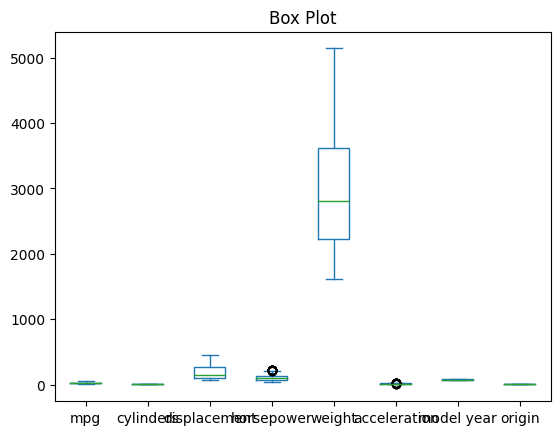

In [ ]:
import matplotlib.pyplot as plt
df.plot.box()
plt.title('Box Plot')
plt.show()

ValueError: num must be an integer with 1 <= num <= 8, not 9

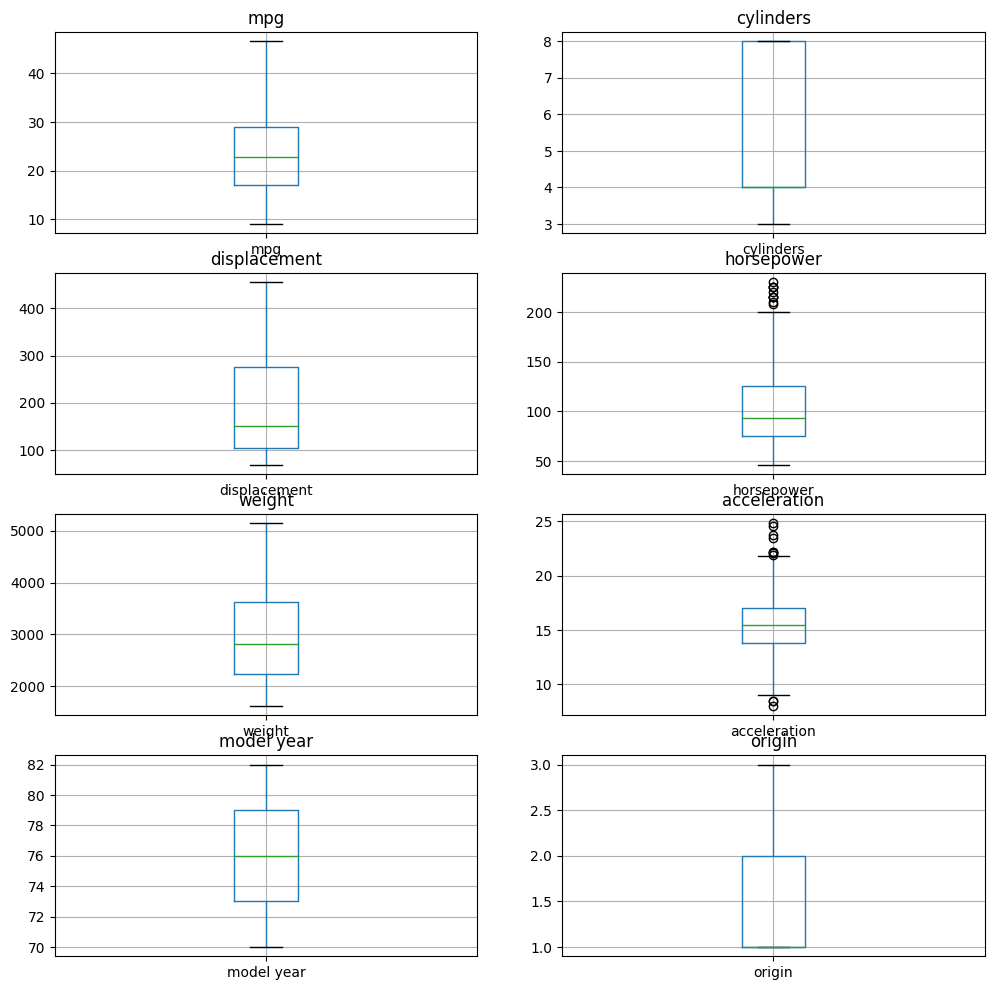

In [ ]:
num_columns = len(df.columns)

#그래프의 크기 설정
plt.figure(figsize = (12,12))

# 각 열에 대한 박스플룻을 그리
for i, column in enumerate(df.columns):
    plt.subplot(4 ,2 , i + 1)
    df.boxplot(column=column)
    plt.title(column)

plt.tight_layout()
plt.show

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
target_variable='mpg'
corr_matrix = df1
corr_matrix[target_variable]

mpg             1.000000
cylinders      -0.777618
displacement   -0.805127
horsepower     -0.778427
weight         -0.832244
acceleration    0.423329
model year      0.580541
origin          0.565209
Name: mpg, dtype: float64

In [ ]:
target_variable='mpg'
corr_threshold=0.5
corr_features = corr_matrix[target_variable][abs(corr_matrix[target_variable])>
                                             corr_threshold].index.tolist()

#선택된 변수 출력
print(f'Variables highly correlated with {target_variable}: {corr_features}')

Variables highly correlated with mpg: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'model year', 'origin']


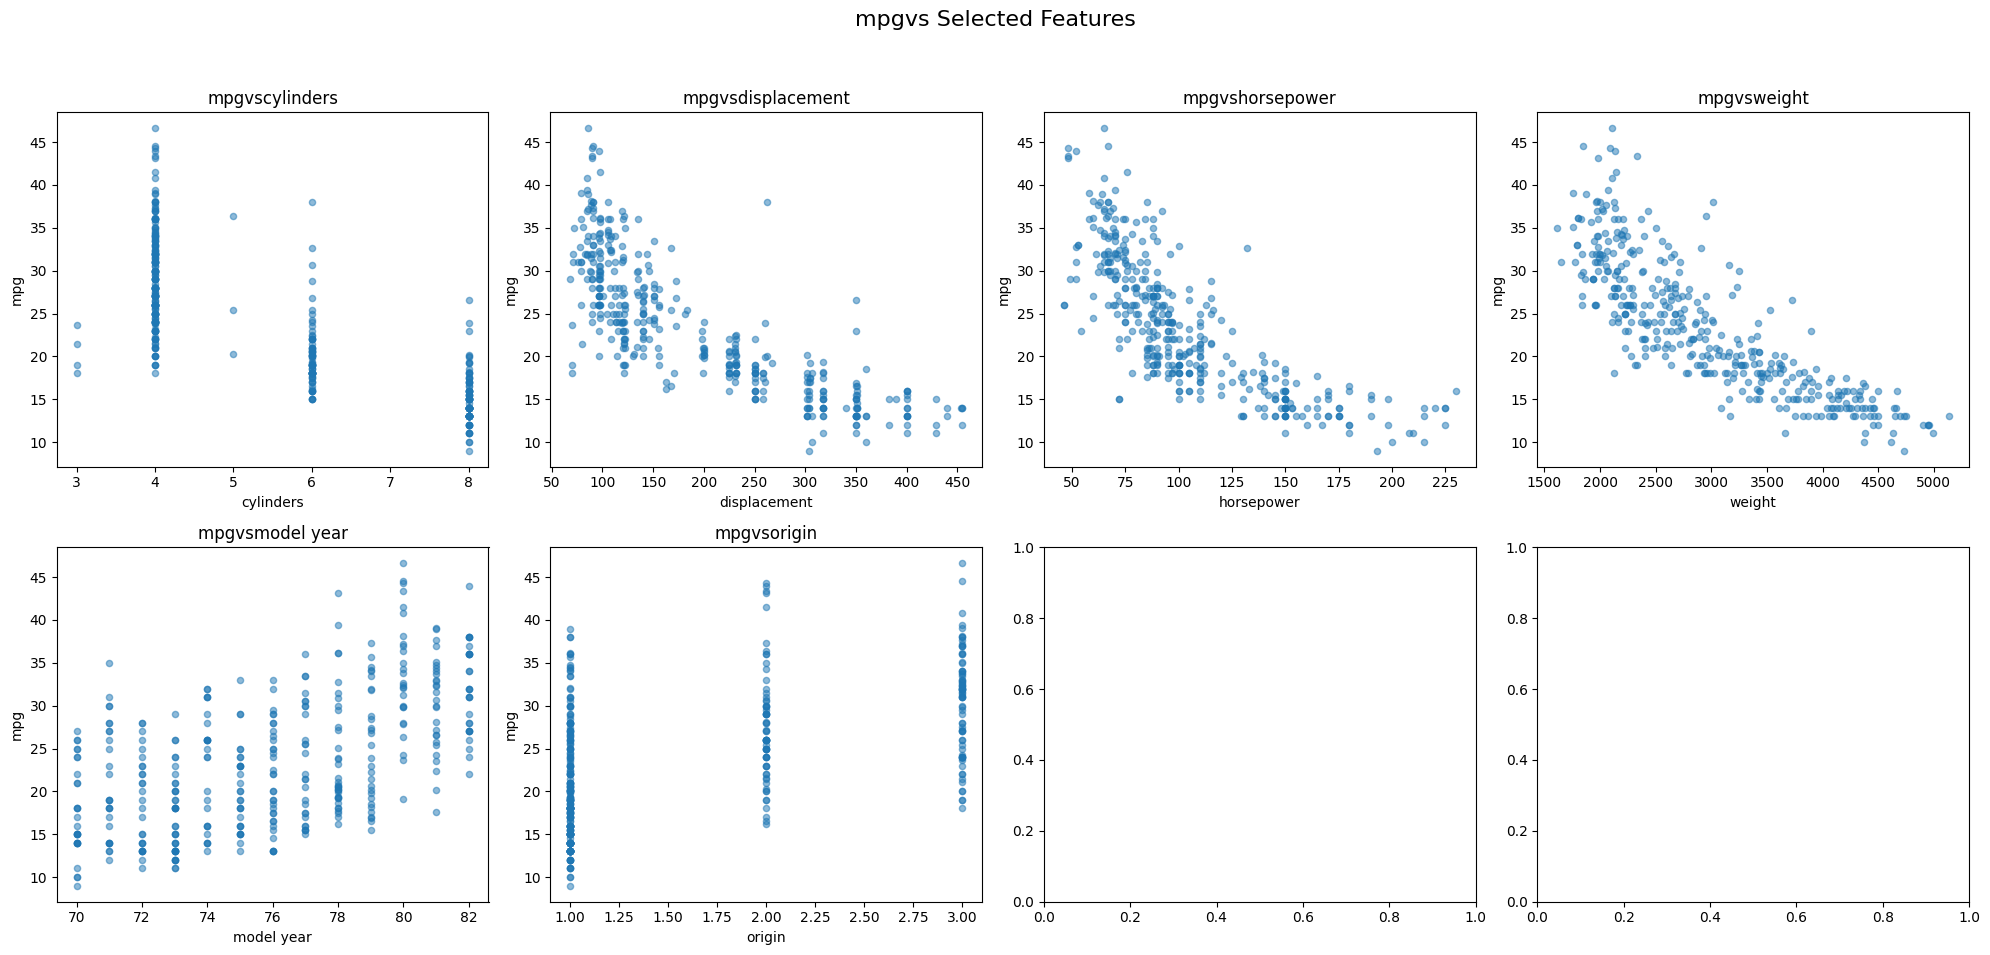

In [ ]:
columns = [ 'cylinders', 'displacement', 'horsepower', 'weight', 'model year', 'origin']
target = 'mpg'

#2행 4열의 subplot 설정
fig, axes = plt.subplots(nrows =2 , ncols = 4, figsize = (20,10))

# 각 subplot에 산점도 그리기
for i , col in enumerate(columns):
    row, col_idx = divmod(i,4)
    df.plot(kind='scatter', x= col, y=target,ax=axes[row, col_idx], alpha=0.5)
    axes[row, col_idx].set_title(f'{target}vs{col}')

# 전체 제목 설정
fig.suptitle(f'{target}vs Selected Features', fontsize = 16)
plt.tight_layout(rect = [0,0.03, 1, 0.95])
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

correlated_features = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin']
# 분석용 데이터셋 구축
analysis_df = df[correlated_features]
target_variable = 'mpg'
# 데이터셋 확인
print(analysis_df.head())

# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(analysis_df.drop(columns=[target_variable]))

# 표준화된 데이터를 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_features, columns=analysis_df.columns.drop(target_variable))
scaled_df[target_variable] = analysis_df[target_variable].values

# 데이터셋 확인
print(scaled_df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0        -1.5    3504           8.9   
1  15.0          8         350.0        -1.5    3693           8.9   
2  18.0          8         318.0        -1.5    3436           8.9   
3  16.0          8         304.0        -1.5    3433           8.9   
4  17.0          8         302.0        -1.5    3449           8.9   

   model year  origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1  
   cylinders  displacement  horsepower    weight  acceleration  model year  \
0   1.483947      1.077290         0.0  0.620540      0.081038   -1.625315   
1   1.483947      1.488732         0.0  0.843334      0.081038   -1.625315   
2   1.483947      1.182542         0.0  0.540382      0.081038   -1.625315   
3   1.483947      1.048584         0.0  0.536845      0.081038   -1.625315   
4   1.483947      1.029447         0.0  0.555

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

# 회귀 모델 구축
X = scaled_df.drop(columns=[target_variable])
y = scaled_df[target_variable]

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=46)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {round(mse,2)}")
print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared: {r2}")

Mean Squared Error: 8.6
Root Mean Squared Error: 2.93
R-squared: 0.8777219378892792


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [ ]:
def findOutliers(x,column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    iqr = q3 - q1
    y = x[(x[column] > (q3 + 1.5*iqr)) | (x[column] < (q1 - 1.5*iqr))]
    return len(y)


    # price, duration, days_left에 대하여 IQR 기준 이상치 개수 확인
print("price IQR outliers: ",findOutliers(df,'horsepower'))
print("duration IQR outliers: ",findOutliers(df,'acceleration'))
print("days_left IQR outliers: ",findOutliers(df,'model year'))

price IQR outliers:  10
duration IQR outliers:  11
days_left IQR outliers:  0


In [ ]:
horsepower acceleration

In [ ]:
def changeOutliers(x,column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)

    iqr = q3 - q1

    # 이상치를 대체할 Min, Max 설정
    Min = q1 - 1.5*iqr
    Max = q3 + 1.5*iqr

    # Max 보다 큰 값을 Max로 , Min보다 작은 값을 Min으로 대체
    x.loc[(x[column] > Max), column] = Max
    x.loc[(x[column] > Min), column] = Min

    return(x)

# price에 대하여 이상치 대체하기
clean_df = changeOutliers(df,'acceleration')

# price에 대하여 IQR 기준 이상치 개수 확인
print("Price IQR Outliers: ", findOutliers(clean_df,'acceleration'))

Price IQR Outliers:  3


In [ ]:
qw = df['mpg']/df['horsepower']
qw

0     -12.000000
1     -10.000000
2     -12.000000
3     -10.666667
4     -11.333333
         ...    
393   -18.000000
394   -29.333333
395   -21.333333
396   -18.666667
397   -20.666667
Length: 392, dtype: float64

In [ ]:
qw.mean()

-15.63061224489796